    STELLAR CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Galaxy-> '0'
Quasar-> '1'
Star-> '2'

In [4]:
df['class']=df['class'].replace('GALAXY',0)
df['class']=df['class'].replace('QSO',1)
df['class']=df['class'].replace('STAR',2)

In [5]:
X=np.array(df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']])
Y=np.array(df['class'])
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,Y_train)
model1_Y_preds=model1.predict(X_test)
from sklearn .metrics import confusion_matrix
model1_conf_matrix=confusion_matrix(Y_test, model1_Y_preds)
print(model1_conf_matrix)
print("Score of decision tree model")
print(model1.score(X_test,Y_test))

[[14384   404    17]
 [  387  4355     1]
 [   24     1  5427]]
Score of decision tree model
0.96664


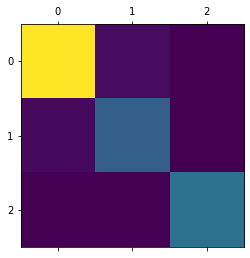

In [7]:
plt.matshow(model1_conf_matrix)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train,Y_train)
model2_Y_preds=model2.predict(X_test)
model2_conf_matrix=confusion_matrix(Y_test, model2_Y_preds)
print(model2_conf_matrix)
print("Score of random forests model")
print(model2.score(X_test,Y_test))

[[14607   164    34]
 [  349  4393     1]
 [    7     0  5445]]
Score of random forests model
0.9778


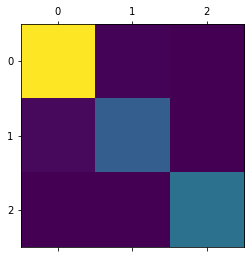

In [9]:
plt.matshow(model2_conf_matrix)

Note here that we achieve only a slightly higher accuracy in random forsts model but require a considerably large amount of time too compute.
so it is best to use decision tree model

there can be plenty of kernels in SVC so analysing data previouxxly gives a clarity of which kernels to use

USING SVM

In [10]:
from sklearn.svm import SVC
model3=SVC(kernel='linear')
model3.fit(X_train,Y_train)
model3_Y_preds=model3.predict(X_test)
model3_conf_matrix=confusion_matrix(Y_test, model3_Y_preds)
print(model3_conf_matrix)
print("Score of SVM model")
print(model3.score(X_test,Y_test))

[[14362   221   222]
 [  575  4164     4]
 [    0     1  5451]]
Score of SVM model
0.95908


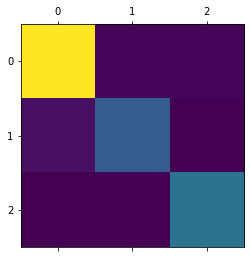

In [11]:
plt.matshow(model3_conf_matrix)

In [12]:
#support vector classifiers have various kernels, they can be linear polynomial

In [13]:
from sklearn.svm import LinearSVC


model4=LinearSVC(max_iter=4000)
model4.fit(X_train,Y_train)
model4_Y_preds=model3.predict(X_test)
model4_conf_matrix=confusion_matrix(Y_test, model4_Y_preds)
print(model4_conf_matrix)
print("Score of SVM model")
print(model4.score(X_test,Y_test))

[[14362   221   222]
 [  575  4164     4]
 [    0     1  5451]]
Score of SVM model
0.93928


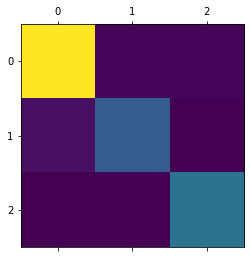

In [14]:
plt.matshow(model4_conf_matrix)

In [15]:
feature_importances=model2.feature_importances_
features=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']
for i in range(0,len(features)):
    print(features[i],":",feature_importances[i])


alpha : 0.015114905184413493
delta : 0.014687811555353727
u : 0.06941520958421245
g : 0.07847220822933866
r : 0.043486033217044015
i : 0.06662413040928403
z : 0.10262470552531938
redshift : 0.6095749962950344


SINCE THE MOST IMPORTANT FEATURE IS THE REDSHIFT LET'S SCATTER THE PLOT WRT REDSHIFT

In [16]:
def range_scaler(a):
    min=np.min(a)
    ptp=np.ptp(a)
    for i in range(0,len(a)):
        a[i]= (a[i] - min)/ptp
    
    return a 

In [17]:
dominant_features=df[['redshift','z']]
redshift=df['redshift']
z=df['z']
class_zero_x=[]
class_one_x=[]
class_two_x=[]
class_zero_y=[]
class_one_y=[]
class_two_y=[]
for i in range(0,len(Y)):
    if Y[i]==0:
        class_zero_x.append(redshift[i])
        class_zero_y.append(z[i])
    if Y[i]==1:
         class_one_x.append(redshift[i])
         class_one_y.append(z[i])
    if Y[i]==2:
          class_two_x.append(redshift[i])
          class_two_y.append(z[i])

In [18]:
class_zero_x=range_scaler(class_zero_x)
class_one_x=range_scaler(class_one_x)
class_two_x=range_scaler(class_two_x)
class_zero_y=range_scaler(class_zero_y)
class_one_y=range_scaler(class_one_y)
class_two_y=range_scaler(class_two_y)

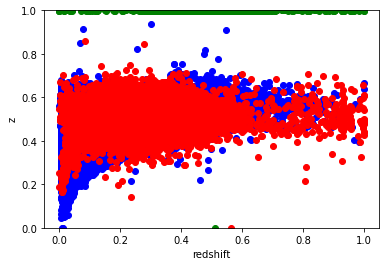

In [19]:
plt.scatter(class_zero_x,class_zero_y,color='blue')
plt.scatter(class_one_x,class_one_y,color='red')
plt.scatter(class_two_x,class_two_y,color='green')
plt.ylim(0,1)
plt.xlabel('redshift')
plt.ylabel('z')
plt.show()

Using Neural Networks to classify the stars

In [20]:
import torch
from torch import nn

In [21]:
y=np.array(pd.get_dummies(df['class'],prefix='type'))
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [22]:
pd.DataFrame(y)

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,1,0,0
99998,1,0,0


In [63]:

class Neural_Network(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.h1=nn.Linear(in_features=input_size,out_features=128)
        self.h2=nn.Linear(128,256)
        ##self.normalize=nn.BatchNorm1d(64)
        self.h3=nn.Linear(256,128)
        self.h4= nn.Linear(128,output_size)
        self.activation=nn.Sigmoid()
        ##self.dropout=nn.Dropout(0.2)
        self.softmax=nn.Softmax(dim=1)
    def forward(self,x):
        x=self.h1(x)
        x=self.activation(x)
        x=self.h2(x)
       # x=self.dropout(x)
        #x=self.normalize(x)
        x=self.activation(x)
        x=self.h3(x)
        x=self.activation(x)
        x=self.h4(x)
        x=self.softmax(x)
        ##for i in x:
          ##  fin.append(torch.max(i))
        return torch.tensor(x,requires_grad=True)

In [64]:
model=Neural_Network(input_size=8,output_size=3)

In [73]:
from torch.utils.data import DataLoader
train_loader_x=DataLoader(X_train,batch_size=1,shuffle=False)
train_loader_y=DataLoader(y_train,batch_size=1,shuffle=False)
test_loader_x=DataLoader(X_test,batch_size=1,shuffle=False)
test_loader_y=DataLoader(y_test,batch_size=1,shuffle=False)

In [74]:
x_loader=[]
y_loader=[]
for i in train_loader_x:
    x_loader.append(i)
for j in train_loader_y:
    y_loader.append(j)

In [85]:
optimizer=torch.optim.SGD(lr=0.0001,params=model.parameters())
criterion=torch.nn.CrossEntropyLoss()
criterion1=torch.nn.MSELoss()
n_epochs=200
loss_list=[]
val_loss_list=[]
import random
for j in range(n_epochs):
    optimizer.zero_grad()
    current=random.randint(0,10000)
    X_batch=x_loader[current]
    y_batch=y_loader[current]
    preds=model(torch.Tensor(X_batch.float()))
    loss=criterion(torch.Tensor(preds),torch.Tensor(y_batch.float()))
    ##val_loss=criterion(torch.Tensor(model(torch.Tensor(X_test))),torch.Tensor(y_test))
    loss.backward()
    loss_list.append(loss.item())
       ## val_loss_list.append(val_loss.item())
    optimizer.step()
       

C:\Users\ved14\AppData\Local\Temp/ipykernel_38716/319511672.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x,requires_grad=True)


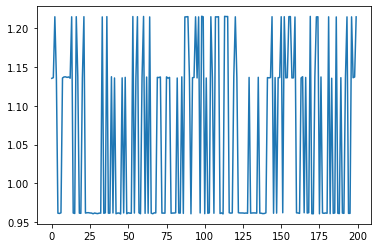

In [86]:
plt.plot(loss_list)

In [80]:
val_loss_list

[1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346923828,
 1.0477924346

In [49]:
nn_preds=model(torch.Tensor(X_test))
preds=[]
for i in nn_preds.detach().numpy():
    preds.append(np.argmax(i))

C:\Users\ved14\AppData\Local\Temp/ipykernel_38716/319511672.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x,requires_grad=True)


In [61]:
#to be continued

1172